# Assignment 5: PCA and Clustering (40 marks)
### Due: December 6 at 11:59pm 
(Dropbox will remain open until December 8 at 11:59pm)

### Name: 

The purpose of this assignment is to practice using PCA and clustering techniques on a given dataset.

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import mglearn
from yellowbrick.cluster.elbow import kelbow_visualizer

## Part 1: Principle Component Analysis (PCA) (18 marks)

### Step 1. Load data (2 marks)

You have been asked by an agricultural company to help them predict the type of wheat based on kernel characteristics. You have been given all the information you need in the seeds_dataset.txt file on D2L. The original dataset can be found [here](https://archive.ics.uci.edu/dataset/236/seeds)

The first step is to read in the file using pandas and inspect the first few columns. Note that the data is in a text file, so the separator is different compared to a csv file.

In [25]:

seed_data=pd.read_csv('seeds_dataset.txt', sep='\t', header=None, names=["Area", "Perimeter", "Compactness", "Length", "Width", "Asymmetry", "Groove", "Class"])
seed_data.head()

,Area,Perimeter,Compactness,Length,Width,Asymmetry,Groove,Class
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


Next, you will need to separate the data into your feature matrix and target vector.

In [26]:
# TODO: Separate the data into feature matrix and target vector. Print the shape of X and y
X = seed_data.drop(columns=['Class'])
y = seed_data["Class"]
y_classes = ["1", "2", "3"]
print(X.shape)
print(y.shape)

(210, 7)
(210,)


### Step 2: Preprocessing (2 marks)

To preprocess the data, we will need to scale the data. Which scaler would you select and why? *(1 mark)* 

1. When inspecting the data, I see no reason to use anything other than StandardScaler(). The samples are well distributed with no large outliers, and should peform well with standard scaling. 

Before we implement the scaler, we need to split the data into training and testing sets first.

In [27]:
# TODO: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0, stratify=y)


In [28]:
# TODO: Print the shape of the training feature matrix and target vector
print(X_train.shape)
print(y_train.shape)

(157, 7)
(157,)


Now that we have our training data, we can implement our selected scaler.

In [29]:
# TODO: Scale the data
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


### Step 3: Model Selection (1 mark)

The next step is to instantiate our selected model. In this case, we will be using `LogisticRegression()`

In [30]:
# TODO: Instantiate model

LR = LogisticRegression()

### Step 4: Validation (2 marks)

To validate the results, we need to use cross-validation. To make sure we are using the best hyperparmeters, we can use a grid search. The parameter grid has been provided below.

In [31]:
param_grid = {'C': [0.01, 0.1, 1.0, 10.0],
             'fit_intercept': [True, False]}

In [32]:
#TODO: Implement the grid search and print the best parameters, cross-validation score and test score
grid = GridSearchCV(LR, param_grid, cv=5, scoring='accuracy', refit=True)
grid.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1.0, 10.0],
                         'fit_intercept': [True, False]},
             scoring='accuracy')

In [33]:
print(grid.best_params_)
print(f'Cross-Validation accuracy {grid.best_score_:.2f}')
print(f'Test accuracy: {grid.score(X_test_scaled, y_test):.2f}')

{'C': 10.0, 'fit_intercept': True}
Cross-Validation accuracy 0.95
Test accuracy: 0.94


### Step 5: Visualize using PCA (3 marks)

Now you can visualize the results from Step 4 using PCA. Use the best parameters from the previous step to predict the label for the testing data. For the plot, each data point must be colored based on the class label.

In [34]:
# TODO: Predict y labels using best estimator
y_pred = grid.predict(X_test_scaled)

In [35]:
# TODO: Reduce dimensions of test data for plotting
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X_test_scaled)
X_pca = pca.transform(X_test_scaled)



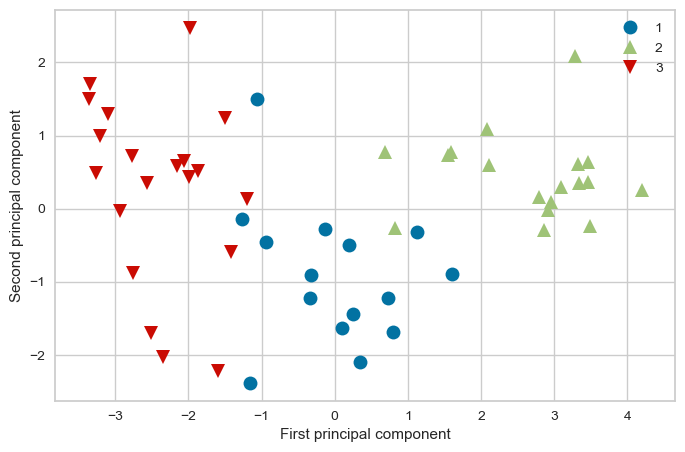

In [36]:
# TODO: Plot test points colored by predicted label
plt.figure(figsize=(8, 8))
mglearn.discrete_scatter(X_pca[:, 0], X_pca[:, 1], y_pred)
plt.legend(y_classes, loc="best")
plt.gca().set_aspect("equal")
plt.xlabel("First principal component")
plt.ylabel("Second principal component");

#### Questions (4 marks)

1. Did the logistic regression model work well for this dataset? Why would you make this conclusion? *(2 marks)*
1. Did PCA work well for this model? How does this relate to the results from the model used? *(2 marks)*

#### Answers

1. I believe the model is acceptable for this dataset. The accuracy for the training data (0.94) and the accuracy for the testing data (0.98) were both fairly high. The fact that they were both high scores and close together indicates that the model is neither over or underfit, and generalizes well to new data.  

1. The visualization with PCA looks like it worked very well, as all of the classes are closely clustered together in distinct groups. We've managed to reduce the dimensionality of the data in order to visualize it, while retaining enough of the variance to allow us to distinguish our target classes. PCA and LogisticRegression both worked well, which implies that the underlying data has a linear relationship to it.

### Process Description (4 marks)
Please describe the process you used to create your code. Cite any websites or generative AI tools used. You can use the following questions as guidance:
1. Where did you source your code?
1. In what order did you complete the steps?
1. If you used generative AI, what prompts did you use? Did you need to modify the code at all? Why or why not?
1. Did you have any challenges? If yes, what were they? If not, what helped you to be successful?

1) All code was either original, or sourced from course examples and course notes.
2) I completed the steps in the order that they were laid out, Loading, Preprocessing, Modeling, Validation, and Visualization.
3) I did not use any generative AI during this assignment.
4) This part of the assignment was very straightforward, as it closely followed procedures used before during both class and the labs. Attending those and understanding the material helped in completing the assignment.

## Part 2. Implement clustering (20 marks)

The agricultural company approaches you again because they lost all the labels for their data. Use the Kmeans clustering method to assign labels to the seeds dataset used in Part 1.

### Step 1: Cluster using original data (6 marks)

This part of the assignment asks you to implement Kmeans clustering using the orginal feature matrix (after scaling has been performed). 

In [37]:
# TODO: Scale feature matrix
X_cl_scaled = scaler.transform(X)

The first step is to use the elbow method to determine the optimal number of clusters. In this case, you can use the distortion metric.

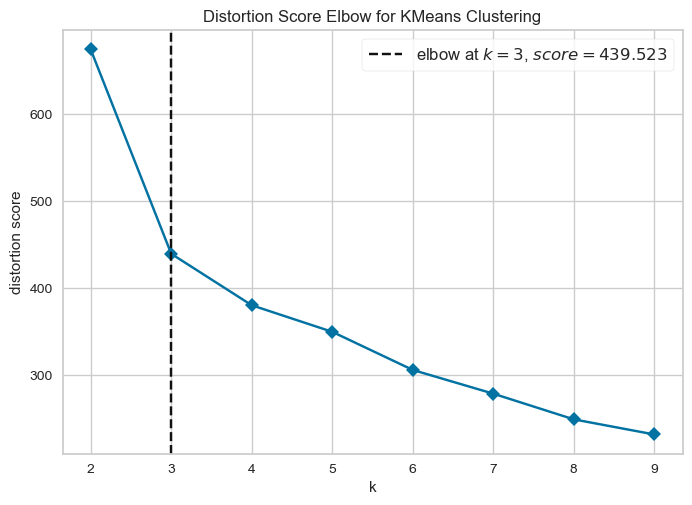

KElbowVisualizer(ax=<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>,
                 estimator=KMeans(n_clusters=9, n_init='auto', random_state=54),
                 k=(2, 10), timings=False)

In [38]:
# TODO: Use the elbow method to determine the optimal number of clusters
from sklearn.cluster import KMeans

kelbow_visualizer(KMeans(random_state=54, n_init='auto'), X_cl_scaled, k=(2,10), 
                  metric='distortion',
                 timings=False)

Next, implement Kmeans and calculate the following validation metrics:
- Silhouette score
- Calinski-Harabasz score
- Davies-Bouldin score

In [39]:
# TODO: Implement K-means with the number of clusters determined in the previous step
kmeans = KMeans(n_clusters=3, n_init='auto', random_state=54)
kmeans.fit(X_cl_scaled)
y_cl_pred = kmeans.predict(X_cl_scaled)


In [40]:
# TODO: Calculate the three different validation metrics
import warnings
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import silhouette_score
warnings.filterwarnings("ignore")
results = pd.DataFrame(columns=["Silhouette", "Calinski-Harabasz", "Davies_Bouldin"])

results.loc['Non-PCA'] = (silhouette_score(X_cl_scaled, y_cl_pred), calinski_harabasz_score(X_cl_scaled, y_cl_pred), davies_bouldin_score(X_cl_scaled, y_cl_pred))
print(results)

         Silhouette  Calinski-Harabasz  Davies_Bouldin
Non-PCA    0.404266          244.14132        0.920931


Plot the clustering results using PCA. Remember to color each data point based on the cluster label.

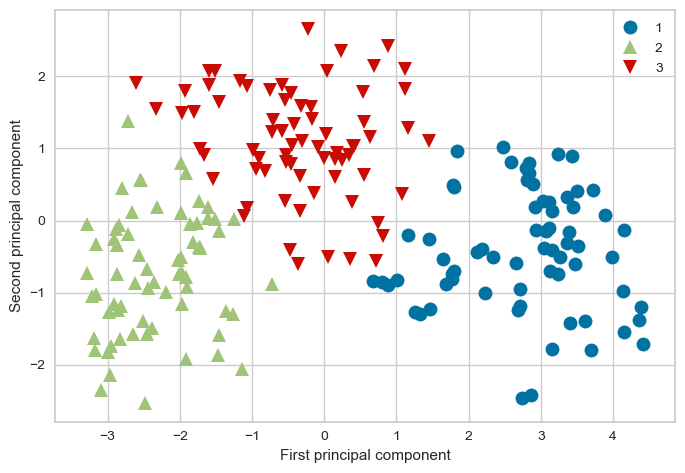

In [41]:
# TODO: Plot clustering results
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X_cl_scaled)
X_pca = pca.transform(X_cl_scaled)

plt.figure(figsize=(8, 8))
mglearn.discrete_scatter(X_pca[:, 0], X_pca[:, 1], y_cl_pred)
plt.legend(y_classes, loc="best")
plt.gca().set_aspect("equal")
plt.xlabel("First principal component")
plt.ylabel("Second principal component");

### Step 2: Cluster using PCA-transformed data (4 marks)

Implement Kmeans clustering using PCA-transformed data. The first step is to use the explained variance ratio to find the number of components required to explain at least 95% of the variance.

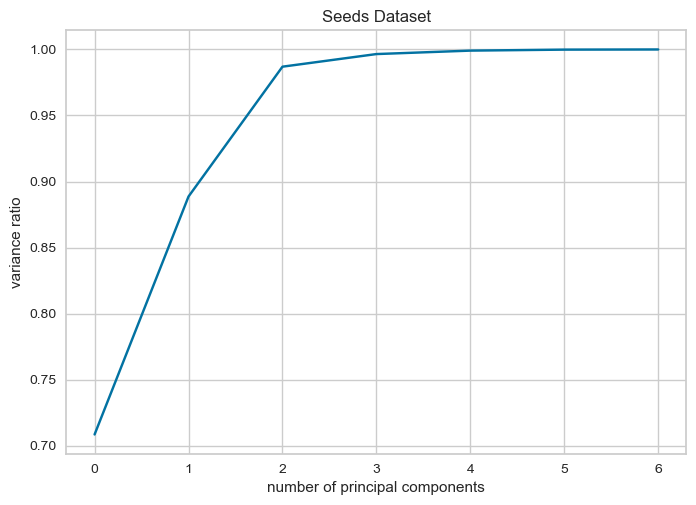

In [42]:
# TODO: Find the number of principal components using explained variance ratio
pca_all = PCA()
pca_all.fit(X_cl_scaled)
plt.plot(np.cumsum(pca_all.explained_variance_ratio_))
plt.xlabel('number of principal components')
plt.ylabel('variance ratio')
plt.title('Seeds Dataset')
plt.grid(True)

Next, transform the data using PCA, implement Kmeans and calculate the three validation metrics used in the previous step.

In [43]:
# TODO: Use PCA to transform the data
pca = PCA(n_components=2)
pca.fit(X_cl_scaled)
X_pca = pca.transform(X_cl_scaled)


In [44]:
# TODO: Implement K-means with the transformed data
kmeans = KMeans(n_clusters=3, n_init='auto', random_state=54)
kmeans.fit(X_pca)
y_pca_pred = kmeans.predict(X_pca)

In [45]:
# TODO: Calculate the three different validation metrics
results.loc['PCA'] = (silhouette_score(X_pca, y_pca_pred), calinski_harabasz_score(X_pca, y_pca_pred), davies_bouldin_score(X_pca, y_pca_pred))


### Step 3: Display results (2 marks)

Print the results for Steps 2 and 3 in a table. Include column and row labels

In [46]:
# TODO: Display results
print(results)


         Silhouette  Calinski-Harabasz  Davies_Bouldin
Non-PCA    0.404266         244.141320        0.920931
PCA        0.495211         386.236429        0.701903


#### Questions (4 marks)

1. Did the optimal number of clusters make sense based on the context? *(1 mark)*
1. Compare the PCA plot from Part 2 step 1 to the PCA plot from Part 1. Did we get similar results? *(1 mark)*
1. How many components did you use for the PCA analysis? Did using PCA improve your results? Why or why not? *(2 marks)*

#### Answers

1. Yes, the elbow visualization showing us that three clusters was optimal makes sense, because we originally started with 3 different class labels in our labelled seed dataset. 
1. Yes, the results were similar. When plotted with PCA, the clusters had more separation and were more distinct.
1. Based on our findings, two components were needed to explain 95% of the variance. All three of the metrics that we calculated showed improvements when we used PCA on our data. We expect that when we reduce the dimensionality of the sample space, as long as we retain most of the variance, the clusters should become less sparse and more distinct. 

### Process Description (4 marks)
Please describe the process you used to create your code. Cite any websites or generative AI tools used. You can use the following questions as guidance:
1. Where did you source your code?
1. In what order did you complete the steps?
1. If you used generative AI, what prompts did you use? Did you need to modify the code at all? Why or why not?
1. Did you have any challenges? If yes, what were they? If not, what helped you to be successful?

1. All the code for this assignment was originally written, or sourced from course notes and examples.
2. I completed the steps in the order that they were assigned - Cluster, PCA, Display.
3. I did not use generative AI for this assignment.
4. The second half of the assignment was very straightforward as well, I just needed to implement the things we learned in the class and the lab.

## Part 3: Reflection (2 marks)
Include a sentence or two about:
- what you liked or disliked,
- found interesting, confusing, challangeing, motivating
while working on this assignment.

This assignment was challenging from both a motivation and deep-understanding perspective. Implementing it was relatively straightforward based on class and lab examples, upon self-reflection I feel like I need to do more work in order to really understand the underlying concepts in order to be able to make the proper implementation decisions on my own. I definitely need to tackle a few more examples without course references in order to solidify my technique.